# **Sistemas inteligentes - Laboratorio 6** #


## Elaboración de grafos en python ##

1. Codificar y ejecutar un algoritmo de búsqueda mediante grafos con la librería “networkx”

Se utiliza la librería networkx utillizando “google colab”. El código crea un grafo vacío y luego agrega tres nodos (1, 2 y 3) y dos conexiones (entre 1 y 2, y entre 2 y 3). Finalmente, se dibuja el grafo con etiquetas para cada nodo. 

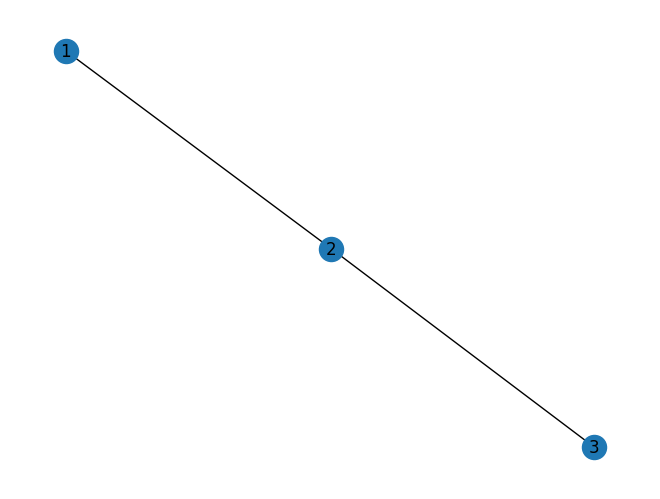

In [20]:
import networkx as nx

#Crear un grafo vacío
G = nx.Graph()

#Agregar nodos al grafo
G.add_node(1)
G.add_node(2)
G.add_node(3)

#Agregar conexiones entre los nodos
G.add_edge(1, 2)
G.add_edge(2, 3)
#El nodo padre es el nodo 1 y el nodo hijo es el nodo 2
#El nodo padre es el nodo 2 y el nodo hijo es el nodo 3

#Dibujar el grafo
nx.draw(G, with_labels=True) #esto dibuja el grafo en una ventana gráfica

2. Codificar y ejecutar un algoritmo de búsqueda mediante grafos con la librería “Networkx” y “matplotlib”.

Otra forma: Para elaborar un grafo en Python, puedes utilizar la biblioteca networkx. Crear un grafo con dos(2) nodos hijos.

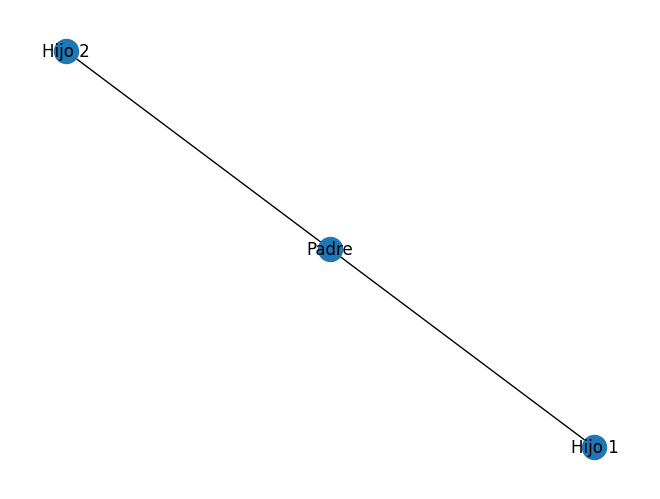

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
G.add_node("Padre")
G.add_node("Hijo 1")
G.add_node("Hijo 2")

# Agregar conexiones entre los nodos    
G.add_edge("Padre", "Hijo 1")
G.add_edge("Padre", "Hijo 2")

# Dibujar el grafo
pos = nx.spring_layout(G) #posiciones de los nodos, mas claros de ver
nx.draw(G, pos, with_labels=True) #esto dibuja el grafo en una ventana gráfica

# Mostrar el grafo
plt.show()

3. Codificar y ejecutar el algoritmo de búsqueda A*

In [17]:
import heapq
class Nodo:
    #def sirve para definir la clase Nodo
    def __init__(self, nombre, heuristica): #nombre del nodo y __init__ es el constructor de la clase
        self.nombre = nombre #nombre del nodo
        self.heuristica = heuristica #heuristica del nodo
        self.vecinos = [] #lista de vecinos del nodo

    def agregar_vecino(self, vecino, distancia):
        self.vecinos.append((vecino, distancia))    #agregar vecino y distancia a la lista de vecinos

class Grafo:
    def __init__(self):
        self.nodos = {} #diccionario de nodos del grafo

    def agregar_nodo(self, nombre, heuristica): 
        nodo = Nodo(nombre, heuristica) #crear nodo
        self.nodos[nombre] = nodo #agregar nodo al diccionario de nodos

    def agregar_arista(self, origen, destino, distancia):
        self.nodos[origen].agregar_vecino(destino, distancia) #agregar vecino y distancia al nodo de origen
        self.nodos[destino].agregar_vecino(origen, distancia) #agregar vecino y distancia al nodo de destino

    def a_estrella(self, origen, destino):
        if origen not in self.nodos or destino not in self.nodos: #verificar si los nodos existen
            return None
        cola = [] #lista de colas
        heapq.heappush(cola, (0, origen)) #agregar nodo de origen a la lista de colas

        while cola:
            distancia_actual, nodo_actual = heapq.heappop(cola) #sacar el nodo con menor distancia de la lista de colas
            if nodo_actual == destino: #verificar si el nodo actual es el nodo destino
                break
            for vecino, distancia in self.nodos[nodo_actual].vecinos: #recorrer los vecinos del nodo actual
                nueva_distancia = distancia_actual + distancia + self.nodos[vecino].heuristica

                heapq.heappush(cola, (nueva_distancia, vecino)) #agregar el vecino a la lista de colas
        return distancia_actual
    
#Ejemplo de uso
grafo = Grafo()
grafo.agregar_nodo("A", 5) #agregar nodo A con heuristica 4
grafo.agregar_nodo("B", 2) #agregar nodo B con heuristica 2
grafo.agregar_nodo("C", 1) #agregar nodo C con heuristica 1 
grafo.agregar_nodo("D", 0) #agregar nodo D con heuristica 0
grafo.agregar_nodo("E", 3) #agregar nodo E con heuristica 3

grafo.agregar_arista("A", "B", 1) #agregar arista entre A y B con distancia 1
grafo.agregar_arista("A", "C", 2) #agregar arista entre A y C con distancia 2
grafo.agregar_arista("B", "D", 3) #agregar arista entre B y D con distancia 3
grafo.agregar_arista("C", "D", 1) #agregar arista entre C y D con distancia 1
grafo.agregar_arista("D", "E", 2) #agregar arista entre D y E con distancia 2
grafo.agregar_arista("B", "E", 4) #agregar arista entre B y E con distancia 4

distancia_minima = grafo.a_estrella("A", "E") #calcular la distancia minima entre A y E
print(f"La distancia mínima entre A y E es: {distancia_minima}") #imprimir la distancia minima entre A y E
   

La distancia mínima entre A y E es: 9


4. Codificar y ejecutar un algoritmo utilizando la librería “scipy”, “matplotlib” y “numpy”.

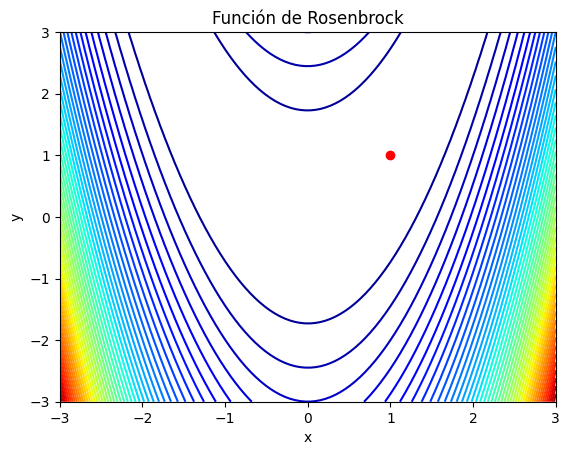

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Definir la función 
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Optimizar la función
x0 = np.array([-2, 2]) # punto inicial de optimización
result = optimize.minimize(rosenbrock, x0, method='BFGS') # método de optimización BFGS

# Graficar la función
# Crear una cuadrícula de puntos
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y]) # calcular los valores de la función en la cuadrícula

# Trazar las líneas de contorno de la función
plt.contour(X, Y, Z, levels=50, cmap='jet')

# Trazar el minimo encontrado
plt.plot(result.x[0], result.x[1], 'ro') # punto rojo

# Etiquetar y titular el gráfico
plt.title('Función de Rosenbrock')
plt.xlabel('x')
plt.ylabel('y')

# Mostrar el gráfico
plt.show()

5. Diseñar y ejecutar una red bayesiana: <br>
Suponiendo que se quiere detectar una cierta enfermedad a través de un test.<br>



Se definen las siguientes variables:<br></br>
E = presencial de la enfermedad, que toma los valores:
* e1 = La persona padece la enfermedad 
* e2 = La persona no padece la enfermedad <br>
</br>

T = resultado del test, que toma los valores:
* t1 = el resultado del test es positivo
* t2 = el resultado del test es negativo<br></br>

F = presencia de fiebre en el enfermo, que toma los valores:
* f1 = el enfermo tiene fiebre
* f2  = el enfermo no tiene fiebre



<img alt="nodo" src="img/nodo.jpg">

A continuación se diseña  y configura el arquetipo cualitativo de la red bayesiana.

<img src="img/arquetipo.png">

Posteriormente se cuantifica la información con la data en el arquetipo cuantitativo de la red bayesiana.

<img src="img/data2.png">

Por último, se analiza los resultados de la red bayesiana. 

<img src="img/data.png">

<img src="img/prob2.png">

<img src="img/prob3.png">

### AUTOR ###

[<img src="https://avatars.githubusercontent.com/u/185051739?v=4" width=115><br><sub>Williams Junnior</sub>](https://github.com/xjunniorrf)
